In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [3]:
type(metro_pd.Date[0])

str

In [4]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [5]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
a = metro_pd.set_index('Date')

In [7]:
a.index

DatetimeIndex(['2020-02-12 06:00:00', '2020-02-13 06:00:00',
               '2020-02-14 06:00:00', '2020-02-15 06:00:00',
               '2020-02-16 06:00:00', '2020-02-17 06:00:00',
               '2020-02-18 06:00:00', '2020-02-19 06:00:00',
               '2020-02-20 06:00:00', '2020-02-21 06:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=142, freq=None)

In [8]:
b = a.loc[a.index.dropna()]

In [9]:
b

,ObjectId,ReportedOn,ReportedCum,Deceased,Recovered,Hospitalized,ICU,Vent,StillIll,PosPatients,...,BCLabTests,BCTestNegative,BCTestPositive,BCTestInc,DBCLabTests,DBCTestNegative,DBCTestPositive,DBCTestInc,WeekQuar,EverQuar
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 06:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 06:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 06:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 06:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16 05:00:00,126,436.0,4876.0,0.0,2343.0,518.0,217.0,93.0,2441.0,212.0,...,94215.0,88414.0,5703.0,98.0,4017.0,3403.0,613.0,1.0,NaN,NaN
2020-06-17 05:00:00,127,269.0,5142.0,1.0,2348.0,525.0,220.0,94.0,2704.0,241.0,...,97421.0,91059.0,6264.0,98.0,3206.0,2645.0,561.0,0.0,NaN,NaN
2020-06-18 05:00:00,128,408.0,5550.0,2.0,2365.0,544.0,222.0,95.0,3093.0,267.0,...,99544.0,92874.0,6572.0,98.0,2123.0,1815.0,308.0,0.0,NaN,NaN


In [10]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
c = b['PosPatients'].dropna()

In [12]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

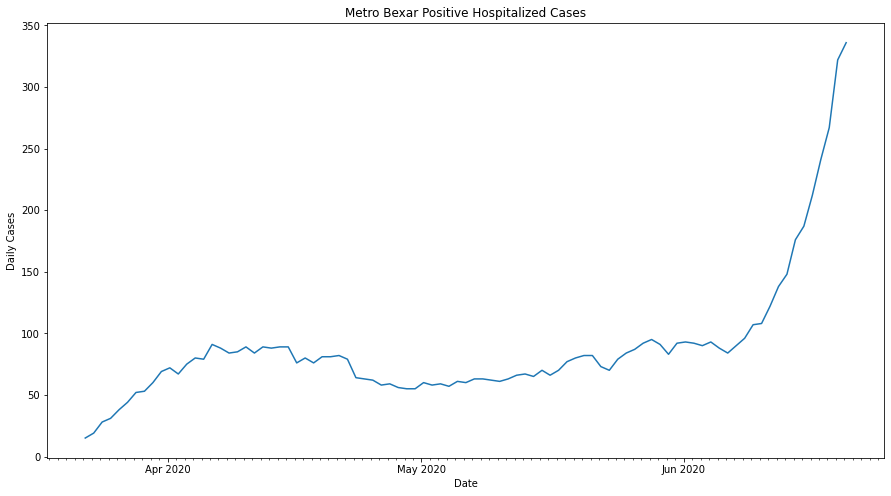

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Cases',color='black')
plt.title('Metro Bexar Positive Hospitalized Cases')
#plt.bar(c.index,c)
plt.plot(c)
fig.savefig('MetroPosHospitalized.png')